# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [44]:
# Libraries
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize']=(12, 4)   # tamaño por defecto, decenas de pixeles

import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [5]:
# your code here
fitbit=pd.read_csv('../data/Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [20]:
steps_avg = fitbit.groupby(['Months_encoded', 'Work_or_Weekend'])['Steps'].median().unstack()
steps_avg.head()

Work_or_Weekend,0,1
Months_encoded,,
1,9688.0,10707.0
2,11974.5,8403.0
3,3885.0,14068.0
4,8682.0,17232.0
5,16095.0,6756.0


<AxesSubplot: >

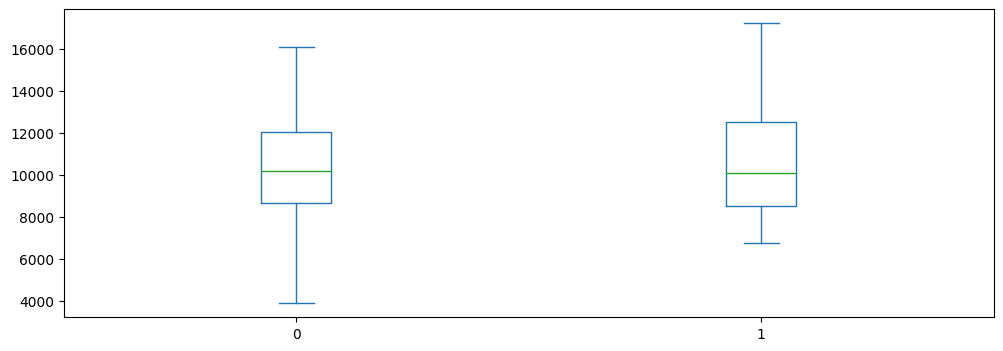

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))
steps_avg.plot(kind='box', ax=ax)

Text(4.444444444444452, 0.5, 'Median Steps')

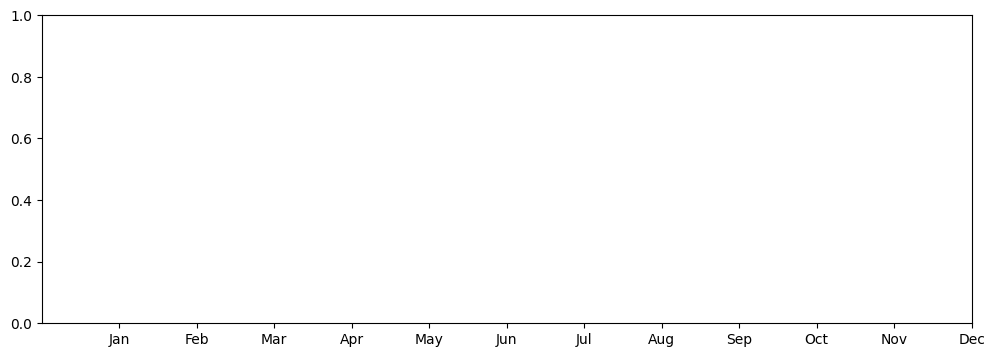

In [43]:
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Median Steps per Month by Weekday/Weekend')
ax.set_xlabel('Month')
ax.set_ylabel('Median Steps')

In [45]:
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig('figures/steps_by_month.png', dpi=300, bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [46]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

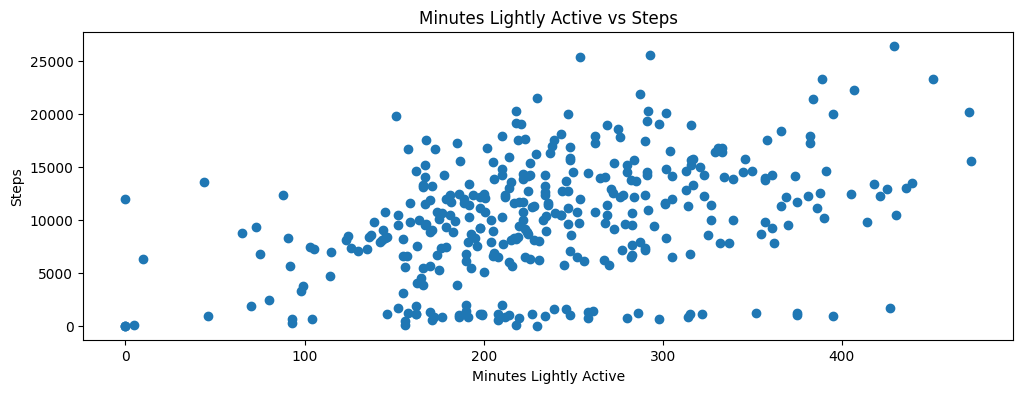

In [50]:
# your code here
plt.scatter(fitbit['Minutes Lightly Active'], fitbit['Steps'])
plt.xlabel('Minutes Lightly Active')
plt.ylabel('Steps')
plt.title('Minutes Lightly Active vs Steps')
plt.show()

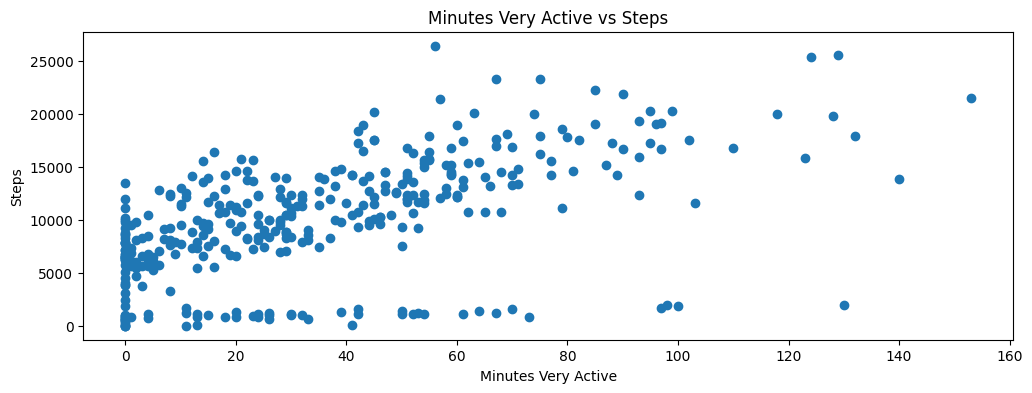

In [49]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Minutes Very Active vs Steps')
plt.show()

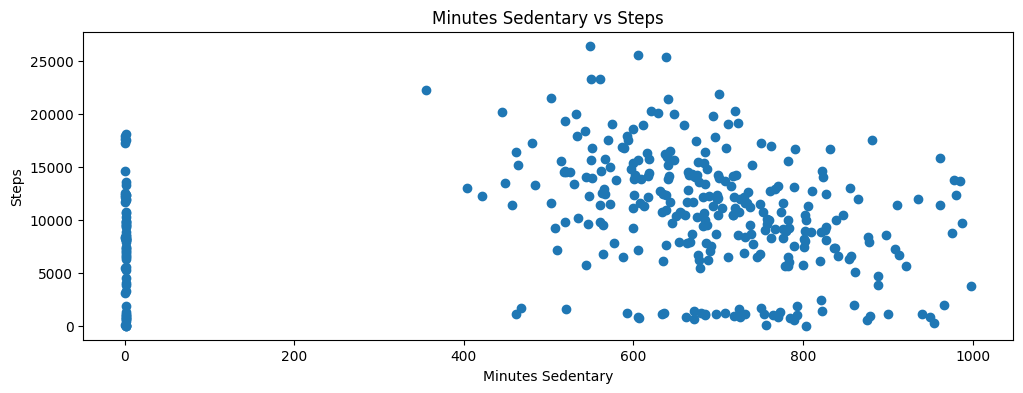

In [51]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Minutes Sedentary vs Steps')
plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [53]:
# your code here
titanic =pd.read_csv('../data/titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [54]:
# your code here
titanic.dtypes()


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
'PassengerId      int64'
'Survived       float64'
'Pclass           int64'
'SibSp            int64'
'Parch            int64'
'Fare           float64'
# your code here

In [ ]:
# CATEGORICAL VARIABLES
'Name            object'
'Gender          object'
'Ticket          object'
'Cabin           object'
'Embarked        object'


# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [55]:
# your code here
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot: xlabel='Age', ylabel='Count'>

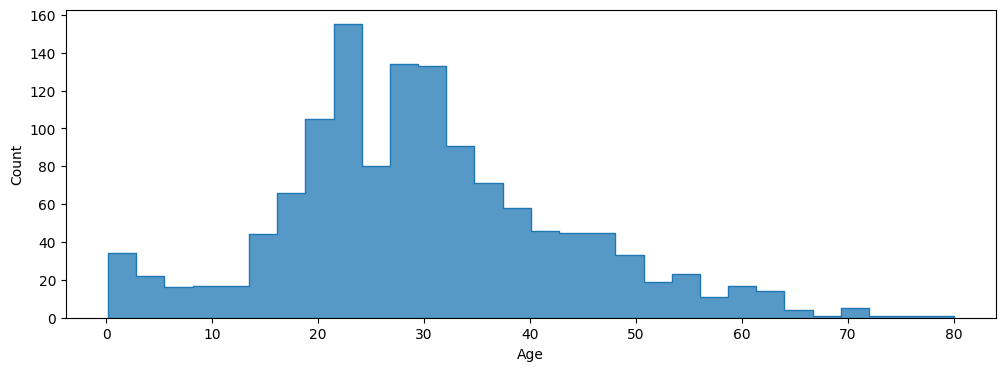

In [60]:
# your code here
sns.histplot(x=titanic.Age,
             element='step'   # es la linea de las barras
            )

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

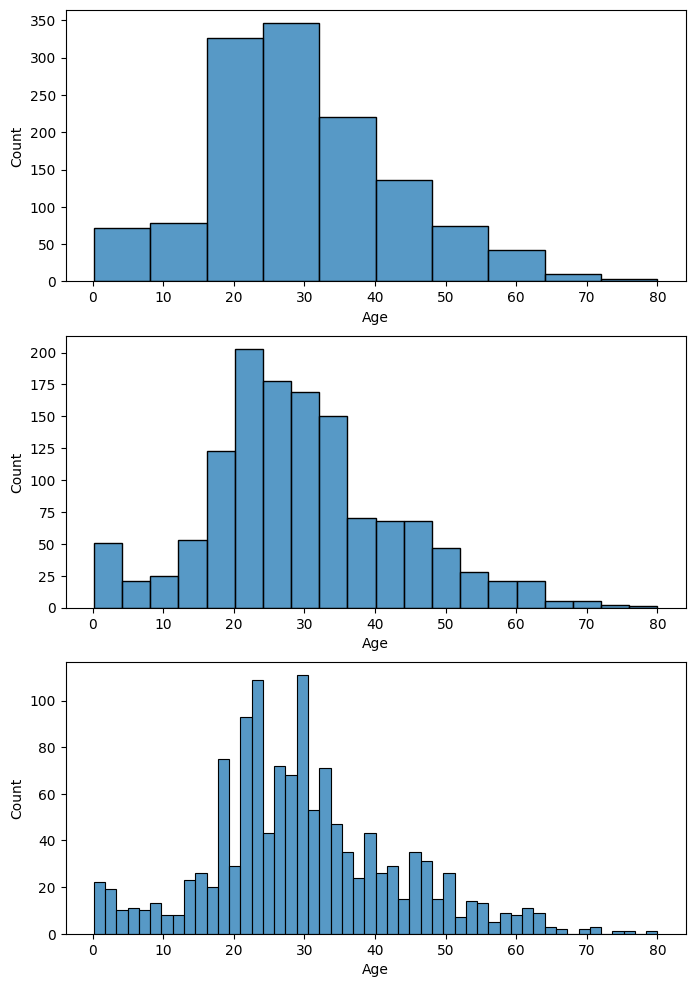

In [61]:
# your code here
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
sns.histplot(ax=axes[0], data=titanic, x='Age', bins=10)
sns.histplot(ax=axes[1], data=titanic, x='Age', bins=20)
sns.histplot(ax=axes[2], data=titanic, x='Age', bins=50)
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot: xlabel='Age', ylabel='Count'>

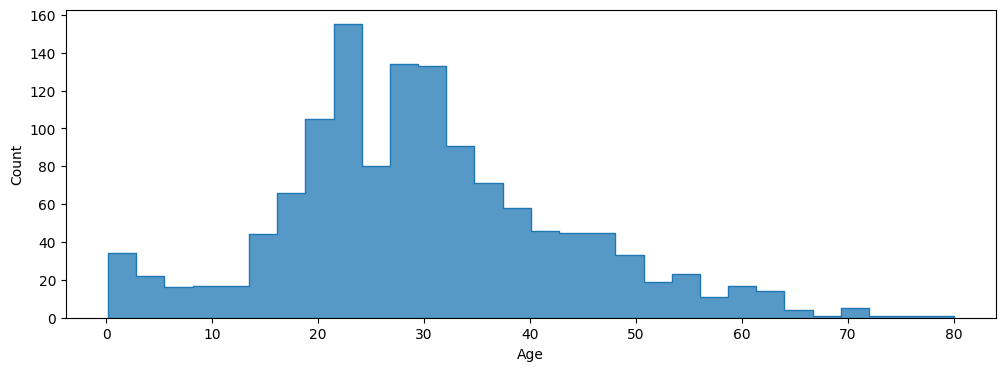

In [62]:
# your code here
# your code here
sns.histplot(x=titanic.Age,
             element='step'   # es la linea de las barras
            )

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot: xlabel='Gender', ylabel='Count'>

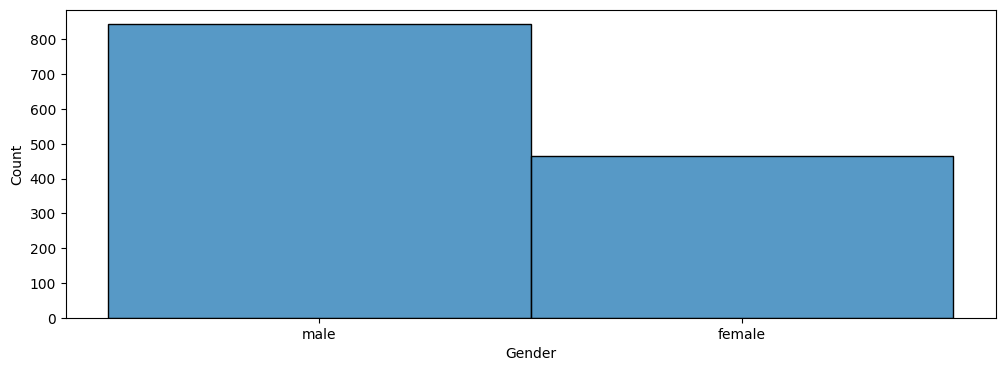

In [65]:
# Method 1 - matplotlib
# your code here
sns.histplot(x=titanic.Gender)   

<BarContainer object of 2 artists>

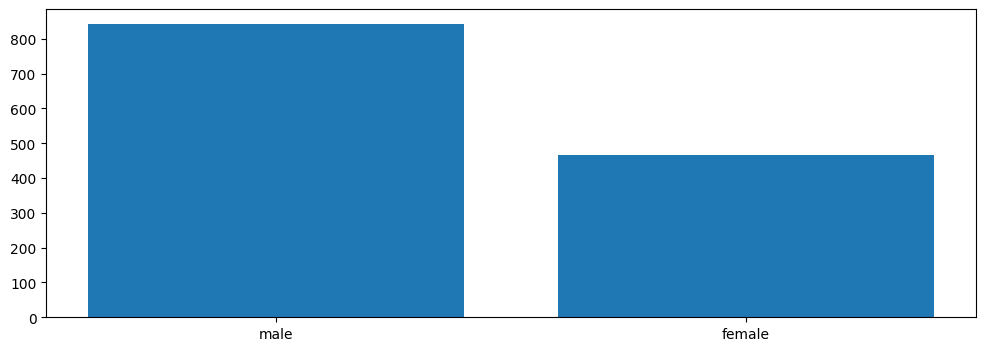

In [73]:
# Method 2 
# your code here
gender= titanic['Gender'].value_counts()
plt.bar(gender.index, gender.values)


#### Use the right plot to visualize the column `Pclass`.

<BarContainer object of 3 artists>

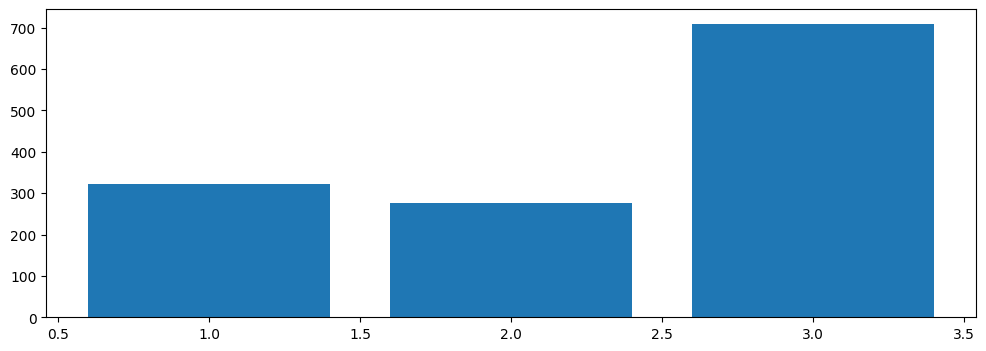

In [70]:
# your code here
pclass= titanic['Pclass'].value_counts()
plt.bar(pclass.index, pclass.values)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x20572483760>,
 'caps': [<matplotlib.lines.Line2D at 0x205724809a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205724831c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20572481390>],
 'fliers': [<matplotlib.lines.Line2D at 0x205724817b0>],
 'means': []}

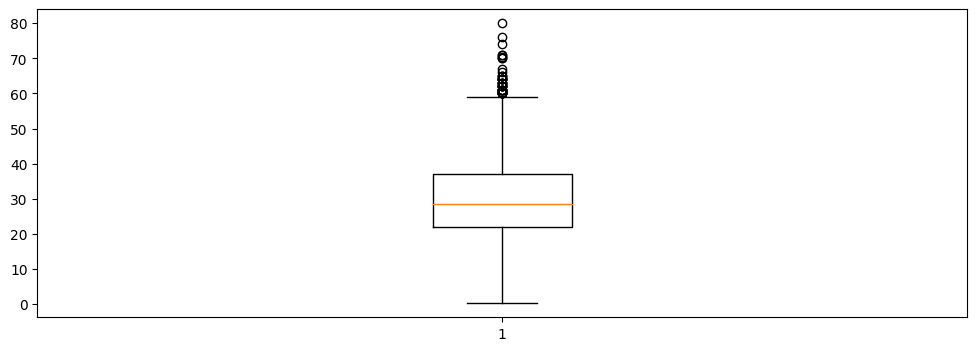

In [76]:
# your code here
plt.boxplot(titanic['Age'])

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

{'bodies': [<matplotlib.collections.PolyCollection at 0x205722890c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20572289ab0>,
 'cmins': <matplotlib.collections.LineCollection at 0x20572289c90>,
 'cbars': <matplotlib.collections.LineCollection at 0x2057228bc70>,
 'cmedians': <matplotlib.collections.LineCollection at 0x20571bd4460>}

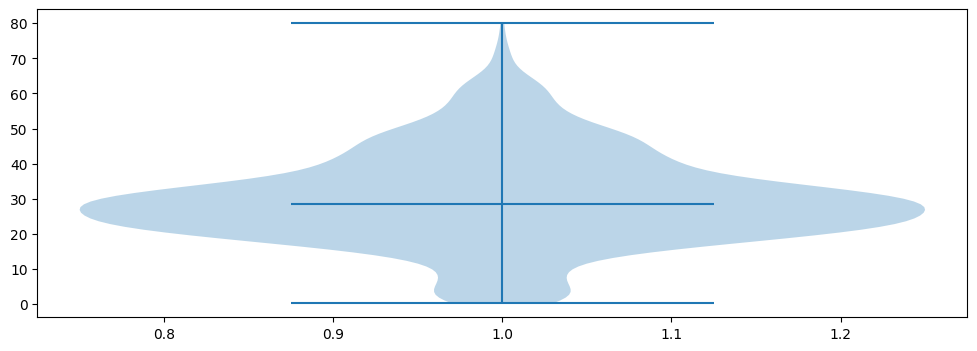

In [77]:
# your code here
plt.violinplot(titanic['Age'], showmedians=True)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [83]:
# Method 1 - matplotlib
# your code here
plt.bar(x=titanic['Age'], y=titanic['Fare'])


TypeError: bar() missing 1 required positional argument: 'height'

<AxesSubplot: xlabel='Age', ylabel='Fare'>

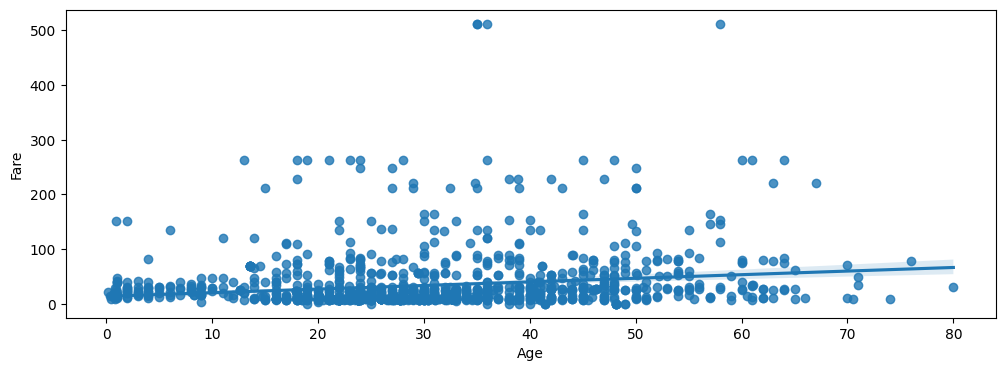

In [79]:

# Method 2 - seaborn
sns.regplot(x=titanic['Age'], y=titanic['Fare'])
# your code here

#### Plot the correlation matrix using seaborn.

C:\Users\Carolina\AppData\Local\Temp\ipykernel_9388\4175282021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


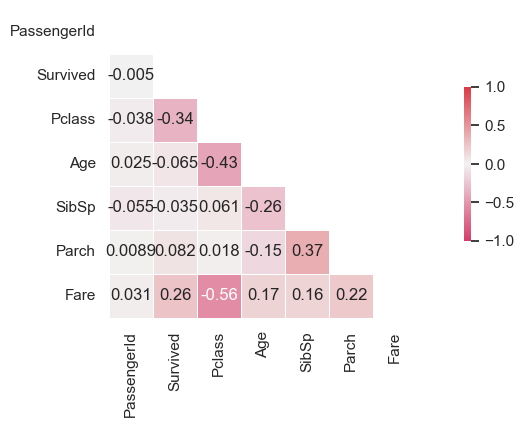

In [86]:
# your code here
corr = titanic.corr()
sns.set(style='white')                            # estilo blanco

mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # color
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           );

#### What are the most correlated features?

In [87]:
"""
Parch con SibSp
"""

'\nParch con SibSp\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

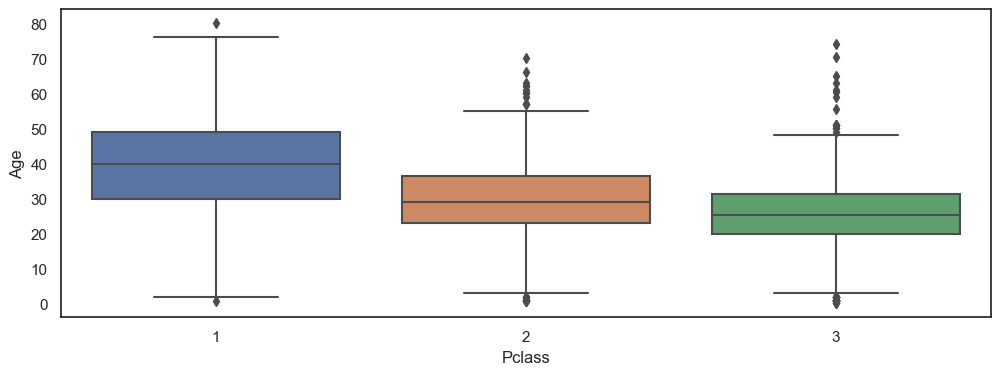

In [88]:
# your code here
sns.boxplot(x='Pclass', y='Age', data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

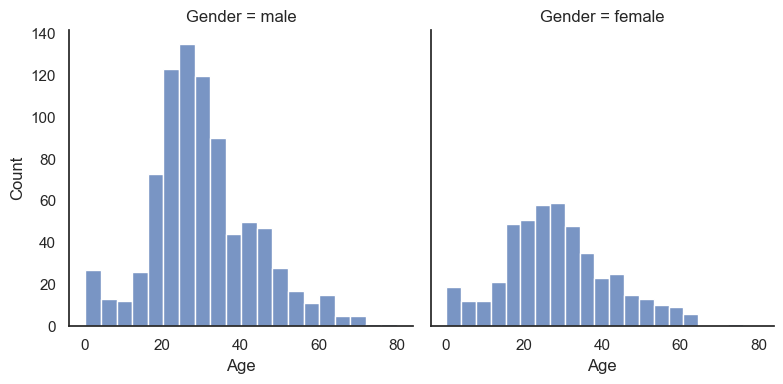

In [90]:
# your code here
g = sns.FacetGrid(data = titanic, col='Gender', height=4, aspect=1)
g.map(sns.histplot, 'Age', bins=20)
g.set_axis_labels('Age', 'Count')
plt.show()